# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** David Irfan Jasir
- **Email:** david.irfan@polteknuklir.ac.id
- **ID Dicoding:** david_ij

## Menentukan Pertanyaan Bisnis

1. Berapa banyak penyewaan sepeda pada tiap harinya?
2. Berapa banyak penyewaan sepeda pada tiap musimnya?
3. Bagaimana perkembangan jumlah penyewa sepeda dari tahun 2011 hingga 2012?
4. Bagaimana jumlah penyewa sepeda pada tiap bulannya pada 2011-2012?
5. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
6. Berapa banyak penyewaan sepeda per tiap jam nya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [76]:
# MENGAMBIL DATASET day.csv DAN DIGUNAKAN SEBAGAI hari_df
hari_df = pd.read_csv("https://raw.githubusercontent.com/davidirfan/TugasProyekDicodingAnalisisData/main/data/day.csv")
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
# MENGAMBIL DATASET hour.csv DAN DIGUNAKAN SEBAGAI jam_df
jam_df = pd.read_csv("https://raw.githubusercontent.com/davidirfan/TugasProyekDicodingAnalisisData/main/data/hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### ASSESING hari_df

In [4]:
# memeriksa tipe data dan jumlah data
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


PENJELASAN : 
<br> Setiap kolom terdapat data yang lengkap dan sebagian besar data bertipe numerik (integer dan float)

In [5]:
# memeriksa missing value tiap kolom
null = hari_df.isna().sum()
print(null)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value di tiap kolom data

In [6]:
# memeriksa duplikasi  data
dupliHari = hari_df.duplicated().sum()
if dupliHari == 0 :
    print("Tidak ada duplikasi")
else :
    print("Ada duplikasi sebanyak", dupliHari)

Tidak ada duplikasi


In [7]:
# memeriksa parameter statistik pada kolom numerik
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


PENJELASAN : berdasarkan hasil pemeriksaan parameter statistik
- Tidak terdapat data yang janggal dan dapat diterima dan dianalisis lebih lanjut
- untuk kolom data tipe integer, yaitu season, yr, mnth, holiday, weekday, workingday, weathersit, merupakan data kategori, nantinya akan dikonversi langsung menjadi nama kategori untuk kemudahan analisis.
- untuk kolom data tipe float, yaitu temp, atemp, hum, dan windspeed, akan dikonversi menjadi nilai ril berdasarkan keterangan pada Readme.txt dari dataset csv nya.

#### ASSESSING jam_df

In [8]:
# memeriksa tipe data dan jumlah data
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


PENJELASAN : 
<br> Setiap kolom terdapat data yang lengkap dan sebagian besar data bertipe numerik (integer dan float)

In [9]:
# memeriksa missing value tiap kolom
null = jam_df.isna().sum()
print(null)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value di tiap kolom data

In [10]:
# memeriksa duplikasi  data
dupliHari = hari_df.duplicated().sum()
if dupliHari == 0 :
    print("Tidak ada duplikasi")
else :
    print("Ada duplikasi sebanyak", dupliHari)

Tidak ada duplikasi


In [11]:
# memeriksa parameter statistik pada kolom numerik
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


PENJELASAN : berdasarkan hasil pemeriksaan parameter statistik
- Tidak terdapat data yang janggal dan dapat diterima dan dianalisis lebih lanjut
- untuk kolom data tipe integer, yaitu season, yr, mnth, holiday, weekday, workingday, weathersit, merupakan data kategori, nantinya akan dikonversi langsung menjadi nama kategori untuk kemudahan analisis.
- untuk kolom data tipe float, yaitu temp, atemp, hum, dan windspeed, akan dikonversi menjadi nilai ril berdasarkan keterangan pada Readme.txt dari dataset csv nya.

### Cleaning Data

#### CLEANING hari_df

In [12]:
# menghapus kolom "instant"
hari_df = hari_df.drop("instant", axis=1)

Kolom 'instant' dihapus untuk memperingkas dataset

In [13]:
# RECHECK

hari_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Mengubaha tipe data ke categorical
hari_df['season'] = hari_df.season.astype('category')
hari_df['yr'] = hari_df.yr.astype('category')
hari_df['mnth'] = hari_df.mnth.astype('category')
hari_df['holiday'] = hari_df.holiday.astype('category')
hari_df['weekday'] = hari_df.weekday.astype('category')
hari_df['workingday'] = hari_df.workingday.astype('category')
hari_df['weathersit'] = hari_df.weathersit.astype('category')

# Mengubah nilai angka menjadi keterangan kategori

hari_df['mnth'] = hari_df['mnth'].replace({
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'Mei',
    6:'Jun',
    7:'Jul',
    8:'Agu',
    9:'Sep',
    10:'Okt',
    11:'Nov',
    12:'Des'
})

hari_df['weathersit'] = hari_df['weathersit'].replace({
    1:'Cerah',
    2:'Berawan',
    3:'Hujan_Ringan',
    4:'Hujan_Lebat_Badai',
})

hari_df['yr'] = hari_df['yr'].replace({
    0: '2011', 1: '2012'
})

hari_df['workingday'] = hari_df['workingday'].replace({
    0: 'Hari_Libur', 1: 'Hari_Kerja'
})

hari_df['holiday'] = hari_df['holiday'].replace({
    0: 'Hari_Kerja', 1: 'Hari_Libur'
})

hari_df['season'] = hari_df['season'].replace({
    1:'Semi',
    2:'Panas',
    3:'Gugur',
    4:'Dingin',
})

hari_df['weekday'] = hari_df['weekday'].replace({
    0:'Minggu',
    1:'Senin',
    2:'Selasa',
    3:'Rabu',
    4:'Kamis',
    5:'Jumat',
    6:'Sabtu',
})

# recheck
hari_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1205584216.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hari_df['mnth'] = hari_df['mnth'].replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1205584216.py:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hari_df['weathersit'] = hari_df['weathersit'].replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1205584216.py:34: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


PENJELASAN
- Untuk kolom data bertipe numerik integer, diubah tipe datanya menjadi kategori.
- Mengubah nilai numerik integer pada kolom data-data tersebut menjadi nama-nama dari tiap kategorinya.

In [15]:
# mengubah kolom dteday menjadi data tipe datetime
# kolom data yang akan diubah tipe datanya
datetime_columns = ["dteday"]

# mengubah tipe data pada tiap data di tiap kolom
for column in datetime_columns :
    hari_df[column]=pd.to_datetime(hari_df[column])

Tipe data dari kolom dteday diubah menjadi kolom data bertipe datetime

In [16]:
# mengubah nama kolom
hari_df = hari_df.rename(columns={
    'dteday':'tanggal',
    'season':'musim',
    'yr':'tahun',
    'mnth':'bulan',
    'weekday':'hari',
    'holiday':'hari_libur',
    'workingday':'hari_kerja',
    'weathersit':'cuaca',
    'temp':'suhu1',
    'atemp':'suhu2',
    'hum':'kelembapan',
    'windspeed':'laju_angin',
    'casual': 'Penyewa_NonMember',
    'registered':'Penyewa_Member',
    'cnt' : 'Total_Penyewa'
})

# recheck
hari_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nama-nama dari semua kolom untuk kemudahan analisis berikutnya.

In [17]:
# recheck
hari_df.info()
hari_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal            731 non-null    datetime64[ns]
 1   musim              731 non-null    category      
 2   tahun              731 non-null    category      
 3   bulan              731 non-null    category      
 4   hari_libur         731 non-null    category      
 5   hari               731 non-null    category      
 6   hari_kerja         731 non-null    category      
 7   cuaca              731 non-null    category      
 8   suhu1              731 non-null    float64       
 9   suhu2              731 non-null    float64       
 10  kelembapan         731 non-null    float64       
 11  laju_angin         731 non-null    float64       
 12  Penyewa_NonMember  731 non-null    int64         
 13  Penyewa_Member     731 non-null    int64         
 14  Total_Peny

,tanggal,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
# Mengonversi nilai data2 pada kolom suhu1 sesuai dengan penjelasan pada file ReadMe dataset
hari_df["suhu1"] = hari_df["suhu1"]*41
hari_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,14.110847,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,14.902598,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,8.050924,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,8.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,9.305237,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
hari_df["suhu2"] = hari_df["suhu2"]*50
hari_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,14.110847,18.18125,0.805833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,14.902598,17.68695,0.696087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,8.050924,9.47025,0.437273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,8.200000,10.60610,0.590435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,9.305237,11.46350,0.436957,0.186900,82,1518,1600


In [20]:
hari_df["kelembapan"] = hari_df["kelembapan"]*100
hari_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,14.110847,18.18125,80.5833,0.160446,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,14.902598,17.68695,69.6087,0.248539,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,8.050924,9.47025,43.7273,0.248309,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,8.200000,10.60610,59.0435,0.160296,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,9.305237,11.46350,43.6957,0.186900,82,1518,1600


In [21]:
hari_df["laju_angin"] = hari_df["laju_angin"]*67
hari_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
hari_df.info()
hari_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal            731 non-null    datetime64[ns]
 1   musim              731 non-null    category      
 2   tahun              731 non-null    category      
 3   bulan              731 non-null    category      
 4   hari_libur         731 non-null    category      
 5   hari               731 non-null    category      
 6   hari_kerja         731 non-null    category      
 7   cuaca              731 non-null    category      
 8   suhu1              731 non-null    float64       
 9   suhu2              731 non-null    float64       
 10  kelembapan         731 non-null    float64       
 11  laju_angin         731 non-null    float64       
 12  Penyewa_NonMember  731 non-null    int64         
 13  Penyewa_Member     731 non-null    int64         
 14  Total_Peny

,tanggal,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [23]:
# ambil data yg 2011 aja
hari2011_df = hari_df[hari_df['tahun'] == '2011']
hari2011_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,Hari_Kerja,Sabtu,Hari_Libur,Berawan,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Semi,2011,Jan,Hari_Kerja,Minggu,Hari_Libur,Berawan,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Semi,2011,Jan,Hari_Kerja,Senin,Hari_Kerja,Cerah,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Semi,2011,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Semi,2011,Jan,Hari_Kerja,Rabu,Hari_Kerja,Cerah,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
# ambil data yg 2012 aja
hari2012_df = hari_df[hari_df['tahun'] == '2012']
hari2012_df.head()

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
365,2012-01-01,Semi,2012,Jan,Hari_Kerja,Minggu,Hari_Libur,Cerah,15.170000,18.78105,69.2500,12.875189,686,1608,2294
366,2012-01-02,Semi,2012,Jan,Hari_Libur,Senin,Hari_Libur,Cerah,11.194763,12.61520,38.1304,22.087555,244,1707,1951
367,2012-01-03,Semi,2012,Jan,Hari_Kerja,Selasa,Hari_Kerja,Cerah,6.150000,6.31375,44.1250,24.499957,89,2147,2236
368,2012-01-04,Semi,2012,Jan,Hari_Kerja,Rabu,Hari_Kerja,Berawan,4.407500,5.96685,41.4583,12.374900,95,2273,2368
369,2012-01-05,Semi,2012,Jan,Hari_Kerja,Kamis,Hari_Kerja,Cerah,10.899153,13.92060,52.4167,8.709129,140,3132,3272


#### CLEANING jam_df

In [25]:
# menghapus kolom "instant"
jam_df = jam_df.drop("instant", axis=1)

Kolom 'instant' dihapus untuk memperingkas dataset

In [26]:
# Mengubaha tipe data ke categorical
jam_df['season'] = jam_df.season.astype('category')
jam_df['yr'] = jam_df.yr.astype('category')
jam_df['mnth'] = jam_df.mnth.astype('category')
jam_df['holiday'] = jam_df.holiday.astype('category')
jam_df['weekday'] = jam_df.weekday.astype('category')
jam_df['workingday'] = jam_df.workingday.astype('category')
jam_df['weathersit'] = jam_df.weathersit.astype('category')

# Mengubah nilai angka menjadi keterangan kategori

jam_df['mnth'] = jam_df['mnth'].replace({
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'Mei',
    6:'Jun',
    7:'Jul',
    8:'Agu',
    9:'Sep',
    10:'Okt',
    11:'Nov',
    12:'Des'
})

jam_df['weathersit'] = jam_df['weathersit'].replace({
    1:'Cerah',
    2:'Berawan',
    3:'Hujan_Ringan',
    4:'Hujan_Lebat_Badai',
})

jam_df['yr'] = jam_df['yr'].replace({
    0: '2011', 1: '2012'
})

jam_df['workingday'] = jam_df['workingday'].replace({
    0: 'Hari_Libur', 1: 'Hari_Kerja'
})

jam_df['holiday'] = jam_df['holiday'].replace({
    0: 'Hari_Kerja', 1: 'Hari_Libur'
})

jam_df['season'] = jam_df['season'].replace({
    1:'Semi',
    2:'Panas',
    3:'Gugur',
    4:'Dingin',
})

jam_df['weekday'] = jam_df['weekday'].replace({
    0:'Minggu',
    1:'Senin',
    2:'Selasa',
    3:'Rabu',
    4:'Kamis',
    5:'Jumat',
    6:'Sabtu',
})

# recheck
jam_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\801369633.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  jam_df['mnth'] = jam_df['mnth'].replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_22492\801369633.py:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  jam_df['weathersit'] = jam_df['weathersit'].replace({
C:\Users\USER\AppData\Local\Temp\ipykernel_22492\801369633.py:34: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the ca

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.24,0.2879,0.75,0.0,0,1,1


PENJELASAN
- Untuk kolom data bertipe numerik integer, diubah tipe datanya menjadi kategori.
- Mengubah nilai numerik integer pada kolom data-data tersebut menjadi nama-nama dari tiap kategorinya.

In [27]:
# mengubah kolom dteday menjadi data tipe datetime
# kolom data yang akan diubah tipe datanya
datetime_columns = ["dteday"]

# mengubah tipe data pada tiap data di tiap kolom
for column in datetime_columns :
    jam_df[column]=pd.to_datetime(jam_df[column])

Tipe data dari kolom dteday diubah menjadi kolom data bertipe datetime

In [28]:
# ubah nama kolom
jam_df = jam_df.rename(columns={
    'dteday':'tanggal',
    'season':'musim',
    'yr':'tahun',
    'mnth':'bulan',
    'weekday':'hari',
    'hr':'jam',
    'holiday':'hari_libur',
    'workingday':'hari_kerja',
    'weathersit':'cuaca',
    'temp':'suhu1',
    'atemp':'suhu2',
    'hum':'kelembapan',
    'windspeed':'laju_angin',
    'casual': 'Penyewa_NonMember',
    'registered':'Penyewa_Member',
    'cnt' : 'Total_Penyewa'
})
jam_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,0.24,0.2879,0.75,0.0,0,1,1


Mengubah nama-nama dari semua kolom untuk kemudahan analisis berikutnya.

In [29]:
# recheck
jam_df.info()
jam_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal            17379 non-null  datetime64[ns]
 1   musim              17379 non-null  category      
 2   tahun              17379 non-null  category      
 3   bulan              17379 non-null  category      
 4   jam                17379 non-null  int64         
 5   hari_libur         17379 non-null  category      
 6   hari               17379 non-null  category      
 7   hari_kerja         17379 non-null  category      
 8   cuaca              17379 non-null  category      
 9   suhu1              17379 non-null  float64       
 10  suhu2              17379 non-null  float64       
 11  kelembapan         17379 non-null  float64       
 12  laju_angin         17379 non-null  float64       
 13  Penyewa_NonMember  17379 non-null  int64         
 14  Penyew

,tanggal,jam,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
jam_df["suhu1"] = jam_df["suhu1"]*41
jam_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,0.2879,0.75,0.0,0,1,1


In [31]:
jam_df["suhu2"] = jam_df["suhu2"]*50
jam_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,0.81,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,0.80,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,0.80,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,0.75,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,0.75,0.0,0,1,1


In [32]:
jam_df["kelembapan"] = jam_df["kelembapan"]*100
jam_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,75.0,0.0,0,1,1


In [33]:
jam_df["laju_angin"] = jam_df["laju_angin"]*67
jam_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,75.0,0.0,0,1,1


In [34]:
jam_df.info()
jam_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal            17379 non-null  datetime64[ns]
 1   musim              17379 non-null  category      
 2   tahun              17379 non-null  category      
 3   bulan              17379 non-null  category      
 4   jam                17379 non-null  int64         
 5   hari_libur         17379 non-null  category      
 6   hari               17379 non-null  category      
 7   hari_kerja         17379 non-null  category      
 8   cuaca              17379 non-null  category      
 9   suhu1              17379 non-null  float64       
 10  suhu2              17379 non-null  float64       
 11  kelembapan         17379 non-null  float64       
 12  laju_angin         17379 non-null  float64       
 13  Penyewa_NonMember  17379 non-null  int64         
 14  Penyew

,tanggal,jam,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [35]:
# ambil data yg 2011 aja
jam2011_df = jam_df[jam_df['tahun'] == '2011']
jam2011_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
0,2011-01-01,Semi,2011,Jan,0,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Semi,2011,Jan,1,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Semi,2011,Jan,2,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Semi,2011,Jan,3,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Semi,2011,Jan,4,Hari_Kerja,Sabtu,Hari_Libur,Cerah,9.84,14.395,75.0,0.0,0,1,1


In [36]:
# ambil data yg 2012 aja
jam2012_df = jam_df[jam_df["tahun"] == '2012']
jam2012_df.head()

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
8645,2012-01-01,Semi,2012,Jan,0,Hari_Kerja,Minggu,Hari_Libur,Cerah,14.76,18.940,66.0,0.0000,5,43,48
8646,2012-01-01,Semi,2012,Jan,1,Hari_Kerja,Minggu,Hari_Libur,Cerah,14.76,17.425,66.0,8.9981,15,78,93
8647,2012-01-01,Semi,2012,Jan,2,Hari_Kerja,Minggu,Hari_Libur,Cerah,13.12,17.425,76.0,0.0000,16,59,75
8648,2012-01-01,Semi,2012,Jan,3,Hari_Kerja,Minggu,Hari_Libur,Cerah,12.30,16.665,81.0,0.0000,11,41,52
8649,2012-01-01,Semi,2012,Jan,4,Hari_Kerja,Minggu,Hari_Libur,Cerah,11.48,15.150,81.0,6.0032,0,8,8


## Exploratory Data Analysis (EDA)

### Explore Dataset day.csv as hari_df

In [37]:
hari_df.describe(include="all")

,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Gugur,2012,Jan,Hari_Kerja,Minggu,Hari_Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### 1. Berapa banyak penyewaan sepeda pada tiap hari nya?

##### hari_kerja

In [38]:
harikerja_df = hari_df.groupby(by="hari_kerja").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)
harikerja_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\259079755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harikerja_df = hari_df.groupby(by="hari_kerja").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
hari_kerja,,,
Hari_Kerja,303285,1989125,2292410
Hari_Libur,316732,683537,1000269


Data tersebut menunjukkan pada tahun 2011 - 2012, banyak orang merental sepeda pada hari_kerja

In [39]:
harikerja2011_df = hari2011_df.groupby(by="hari_kerja").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)
harikerja2011_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\3718344211.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harikerja2011_df = hari2011_df.groupby(by="hari_kerja").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
hari_kerja,,,
Hari_Kerja,118354,737910,856264
Hari_Libur,128898,257941,386839


Data tersebut menunjukkan pada tahun 2011, banyak orang merental sepeda pada hari_kerja

In [40]:
harikerja2012_df = hari2012_df.groupby(by="hari_kerja").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)
harikerja2012_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1328095879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harikerja2012_df = hari2012_df.groupby(by="hari_kerja").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
hari_kerja,,,
Hari_Kerja,184931,1251215,1436146
Hari_Libur,187834,425596,613430


Data tersebut menunjukkan pada tahun 2012, banyak orang merental sepeda pada hari_kerja

##### Setiap Hari dlm Seminggu

In [41]:
hari_df.groupby(by="hari").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1914418239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="hari").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
hari,,,
Jumat,78238,409552,487790
Kamis,61460,423935,485395
Sabtu,153852,323955,477807
Rabu,57319,415729,473048
Selasa,57843,411266,469109
Senin,70784,384719,455503
Minggu,140521,303506,444027


Data tersebut menunjukkan pada tahun 2011 - 2012, banyak orang merental sepeda pada hari Jumat

In [42]:
hari2011_df.groupby(by="hari").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\842051681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2011_df.groupby(by="hari").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
hari,,,
Jumat,29453,152553,182006
Selasa,23989,156349,180338
Senin,31560,148661,180221
Sabtu,59547,120196,179743
Minggu,59603,117471,177074
Kamis,22440,152112,174552
Rabu,20660,148509,169169


Data tersebut menunjukkan pada tahun 2011, banyak orang merental sepeda pada hari Jumat

In [43]:
hari2012_df.groupby(by="hari").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\2464055395.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2012_df.groupby(by="hari").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
hari,,,
Kamis,39020,271823,310843
Jumat,48785,256999,305784
Rabu,36659,267220,303879
Sabtu,94305,203759,298064
Selasa,33854,254917,288771
Senin,39224,236058,275282
Minggu,80918,186035,266953


Data tersebut menunjukkan pada tahun 2012, banyak orang merental sepeda pada hari Kamis

#### 2. Berapa banyak penyewaan sepeda pada tiap musimnya?

In [44]:
hari_df.groupby(by="musim").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\3137784979.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="musim").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
musim,,,
Gugur,226091,835038,1061129
Panas,203522,715067,918589
Dingin,129782,711831,841613
Semi,60622,410726,471348


Data tersebut menunjukkan pada tahun 2011 - 2012, banyak orang merental sepeda pada musim gugur

In [45]:
hari2011_df.groupby(by="musim").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\3835809257.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2011_df.groupby(by="musim").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
musim,,,
Gugur,95450,324200,419650
Panas,77564,269752,347316
Dingin,52813,273324,326137
Semi,21425,128575,150000


Data tersebut menunjukkan pada tahun 2011, banyak orang merental sepeda pada musim gugur

In [46]:
hari2012_df.groupby(by="musim").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1711273923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2012_df.groupby(by="musim").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
musim,,,
Gugur,130641,510838,641479
Panas,125958,445315,571273
Dingin,76969,438507,515476
Semi,39197,282151,321348


Data tersebut menunjukkan pada tahun 2012, banyak orang merental sepeda pada musim gugur

#### 3. Bagaimana perkembangan jumlah penyewa sepeda dari tahun 2011 hingga 2012?

In [47]:
hari_df.groupby(by="tahun").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\4076102923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="tahun").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
tahun,,,
2012,372765,1676811,2049576
2011,247252,995851,1243103


Data tersebut menunjukkan bahwa terjadi peningkatan jumlah penyewa sepeda dari tahun 2011 ke tahun 2012

#### 4. Bagaimana jumlah penyewa sepeda pada tiap bulannya pada 2011 - 2012?

In [48]:
hari_df.groupby(by="bulan").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

# ini pada dua tahun

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\2896573238.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="bulan").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
bulan,,,
Agu,72039,279155,351194
Jun,73906,272436,346342
Sep,70323,275668,345991
Jul,78157,266791,344948
Mei,75285,256401,331686
Okt,59760,262592,322352
Apr,60802,208292,269094
Nov,36603,218228,254831
Mar,44444,184476,228920


Data tersebut menunjukkan banyak penyewa sepeda setiap bulannya pada tahun 2011 - 2012. <br> Bulan Agustus merupakan bulan yang paling banyak penyewa sepeda.

In [49]:
hari2011_df.groupby(by="bulan").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\2932733370.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2011_df.groupby(by="bulan").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
bulan,,,
Jun,30612,112900,143512
Jul,36452,104889,141341
Agu,28842,107849,136691
Mei,31050,104771,135821
Sep,26545,100873,127418
Okt,25222,98289,123511
Nov,15594,86573,102167
Apr,22346,72524,94870
Des,8448,78875,87323


Data tersebut menunjukkan banyak penyewa sepeda setiap bulannya pada tahun 2011. <br> Bulan Juni merupakan bulan yang paling banyak penyewa sepeda.

In [50]:
hari2012_df.groupby(by="bulan").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\721232556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2012_df.groupby(by="bulan").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
bulan,,,
Sep,43778,174795,218573
Agu,43197,171306,214503
Jul,41705,161902,203607
Jun,43294,159536,202830
Okt,34538,164303,198841
Mei,44235,151630,195865
Apr,38456,135768,174224
Mar,31618,133257,164875
Nov,21009,131655,152664


Data tersebut menunjukkan banyak penyewa sepeda setiap bulannya pada tahun 2012. <br> Bulan September merupakan bulan yang paling banyak penyewa sepeda.

#### 5. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

In [51]:
hari_df.groupby(by="cuaca").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\1666983854.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="cuaca").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
cuaca,,,
Cerah,446346,1811606,2257952
Berawan,169776,827082,996858
Hujan_Ringan,3895,33974,37869


Data tersebut menunjukkan jumlah penyewa sepeda pada tahun 2011-2012 berdasarkan kondisi cuacanya.  <br> Terlihat kebanyakan penyewa sepeda menyewa sepeda pada kondisi cuaca cerah.

In [52]:
hari2011_df.groupby(by="cuaca").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\681768446.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2011_df.groupby(by="cuaca").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
cuaca,,,
Cerah,177272,657795,835067
Berawan,67987,314937,382924
Hujan_Ringan,1993,23119,25112


Data tersebut menunjukkan jumlah penyewa sepeda pada tahun 2011 berdasarkan kondisi cuacanya.  <br> Terlihat kebanyakan penyewa sepeda menyewa sepeda pada kondisi cuaca cerah.

In [53]:
hari2012_df.groupby(by="cuaca").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\390198442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari2012_df.groupby(by="cuaca").agg({


,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
cuaca,,,
Cerah,269074,1153811,1422885
Berawan,101789,512145,613934
Hujan_Ringan,1902,10855,12757


Data tersebut menunjukkan jumlah penyewa sepeda pada tahun 2012 berdasarkan kondisi cuacanya.  <br> Terlihat kebanyakan penyewa sepeda menyewa sepeda pada kondisi cuaca cerah.

### Explore Dataset hour.csv as jam

In [54]:
jam_df.describe(include="all")

,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu1,suhu2,kelembapan,laju_angin,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Gugur,2012,Mei,NaN,Hari_Kerja,Sabtu,Hari_Kerja,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Memeriksa kembali parameter statistik dari data pada semua kolomnya.

#### 6. Berapa banyak penyewaan sepeda per tiap jam pada tiap hari nya dan pada jam berapa diperoleh penyewaan sepeda terbanyak?

In [55]:
jam_df.groupby(by="jam").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
jam,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Data tersebut menunjukkan jumlah penyewa sepeda pada tiap jam per hari nya selama tahun 2011 - 2012. <br> Terlihat bahwa kebanyakan penyewa menggunakan sepeda rental pada sore hari dengan kisaran jam 16 - 19. <br> Jam 17 menjadi jam yang paling banyak penyewa sepeda.

In [56]:
jam2011_df.groupby(by="jam").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
jam,,,
17,21473,106159,127632
18,18066,98919,116985
8,6969,88498,95467
19,14525,71277,85802
16,20739,64883,85622
13,20152,49187,69339
12,19006,50192,69198
15,20863,47727,68590
14,21097,45385,66482


Data tersebut menunjukkan jumlah penyewa sepeda pada tiap jam per hari nya di tahun 2011. <br> Terlihat bahwa kebanyakan penyewa menggunakan sepeda rental pada sore hari dengan kisaran jam 16 - 19. <br> Jam 17 menjadi jam yang paling banyak penyewa sepeda.

In [57]:
jam2012_df.groupby(by="jam").agg({
    "Penyewa_NonMember":"sum",
    "Penyewa_Member":"sum",
    "Total_Penyewa":"sum"
}).sort_values(by="Total_Penyewa", ascending=False)

,Penyewa_NonMember,Penyewa_Member,Total_Penyewa
jam,,,
17,32747,176481,209228
18,26430,166357,192787
8,8792,156742,165534
16,33095,109031,142126
19,20980,120007,140987
13,32561,83019,115580
12,30712,84504,115216
15,33743,80816,114559
14,33992,75178,109170


Data tersebut menunjukkan jumlah penyewa sepeda pada tiap jam per hari nya di tahun 2012. <br> Terlihat bahwa kebanyakan penyewa menggunakan sepeda rental pada sore hari dengan kisaran jam 16 - 19. <br> Jam 17 menjadi jam yang paling banyak penyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah penyewaan sepeda pada tiap harinya?

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\895258557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = hari_df.groupby(by="hari").agg({


<function matplotlib.pyplot.show(close=None, block=None)>

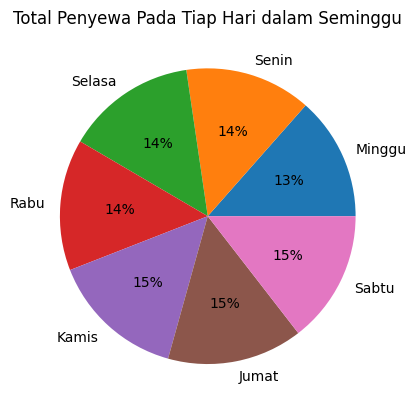

In [58]:
ax = hari_df.groupby(by="hari").agg({
    "Total_Penyewa":"sum"
}).plot(kind='pie', y='Total_Penyewa', autopct = '%1.0f%%', legend=False)
ax.set_ylabel('')
plt.title('Total Penyewa Pada Tiap Hari dalam Seminggu')
plt.show

Berdasarkan grafik tersebut, 
1. hari Kamis, Jumat, dan Sabtu merupakan hari-hari dengan jumlah penyewa sepeda paling banyak, masing-masing sebesar 15%, total ketiga hari menjadi 45% dari total keseluruhan penyewa sepeda selama 2011-2012.
2. Hari Minggu menjadi hari dengan jumlah penyewa sepeda paling sedikit, sekitar 13% dari total keseluruhan penyewa sepeda selama 2011-2012.

### Pertanyaan 2: Berapa banyak penyewaan sepeda pada tiap musimnya?

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\505341519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="musim").agg({


<function matplotlib.pyplot.show(close=None, block=None)>

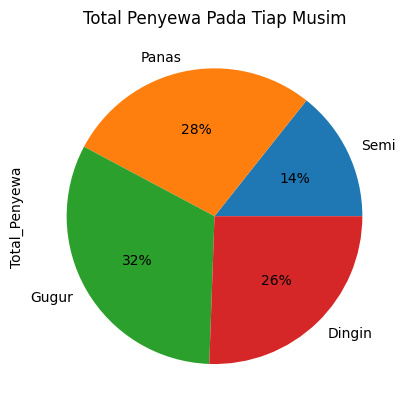

In [59]:
hari_df.groupby(by="musim").agg({
    "Total_Penyewa":"sum"
}).plot(kind='pie', y='Total_Penyewa', autopct = '%1.0f%%', legend=False)

plt.title('Total Penyewa Pada Tiap Musim')
plt.show

Berdasarkan grafik tersebut, 
1. Musim gugur merupakan musim dengan jumlah penyewa sepeda paling banyak, masing-masing sebesar 32% dari total keseluruhan penyewa sepeda selama 2011-2012.
2. Musim semi menjadi musim dengan jumlah penyewa sepeda paling sedikit, sekitar 14% dari total keseluruhan penyewa sepeda selama 2011-2012.

Text(0.5, 1.0, 'Banyak perental sepeda tiap musim pada tahun 2011 dan 2012')

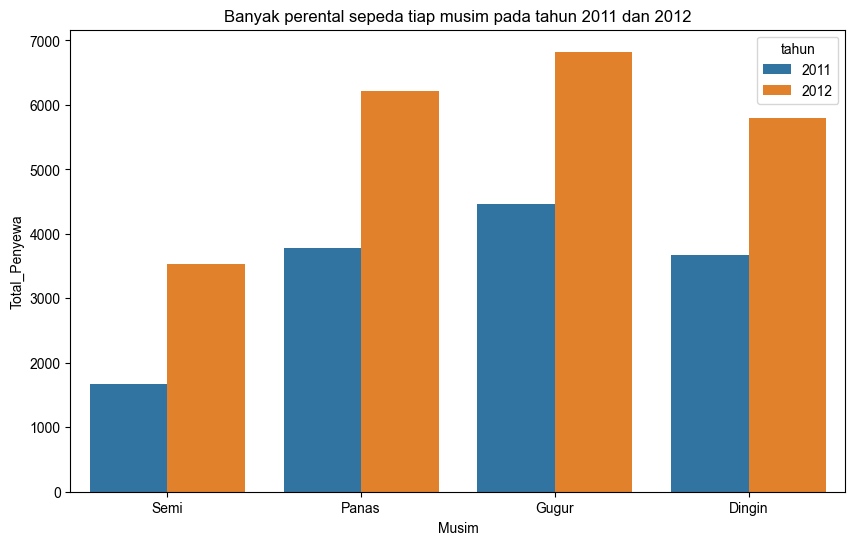

In [60]:
plt.figure(figsize=(10,6))

sns.barplot(x='musim', y='Total_Penyewa',  data=hari_df, hue='tahun', errorbar=None)
sns.set_style("darkgrid")

plt.xlabel('Musim')
plt.ylabel('Total_Penyewa')
plt.title('Banyak perental sepeda tiap musim pada tahun 2011 dan 2012')

Berdasarkan grafik tersebut, dapat diketahui terjadi peningkatan jumlah penyewa sepeda dari 2011 ke 2012 pada tiap musimnya.

### Pertanyaan 3 : Bagaimana perkembangan jumlah penyewa sepeda dari tahun 2011 hingga 2012?

Text(0.5, 1.0, 'Banyak perental sepeda tiap bulan pada tahun 2011 dan 2012')

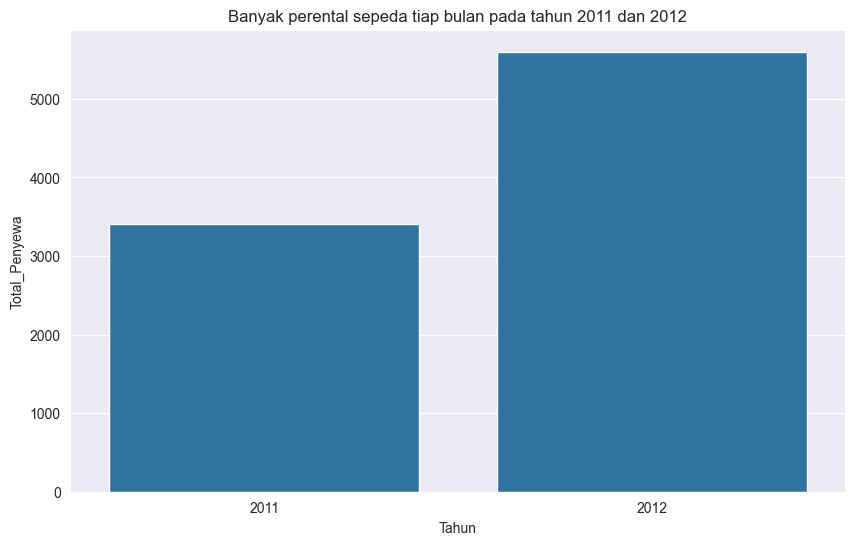

In [61]:
plt.figure(figsize=(10,6))

sns.barplot(x='tahun', y='Total_Penyewa',  data=hari_df, errorbar=None)

sns.set_style("darkgrid")

plt.xlabel('Tahun')
plt.ylabel('Total_Penyewa')
plt.title('Banyak perental sepeda tiap bulan pada tahun 2011 dan 2012')

Terjadi peningkatan jumlah penyewa sepeda dari tahun 2011 ke tahun 2012

### Pertanyaan 4 : Bagaimana jumlah penyewa sepeda pada tiap bulannya pada 2011-2012?

Text(0.5, 1.0, 'Banyak perental sepeda tiap bulan pada tahun 2011 dan 2012')

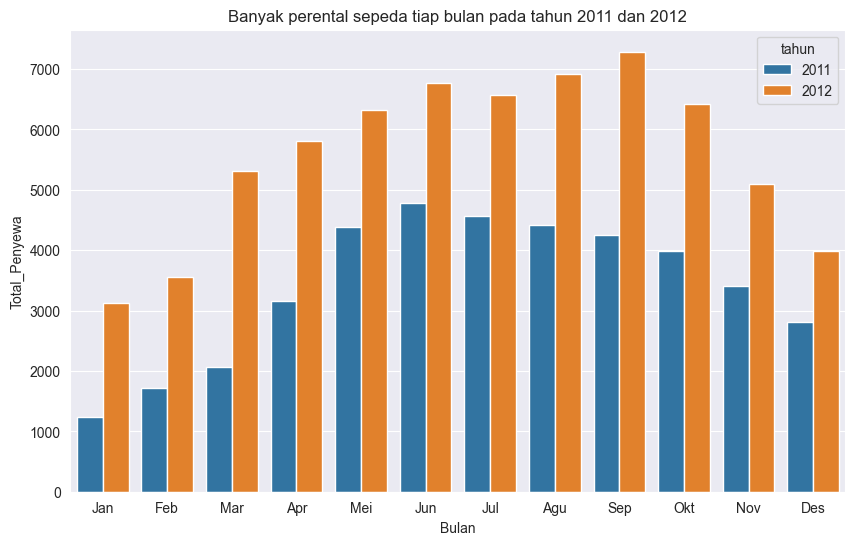

In [62]:
plt.figure(figsize=(10,6))

sns.barplot(x='bulan', y='Total_Penyewa',  data=hari_df, hue='tahun', errorbar=None)

sns.set_style("darkgrid")

plt.xlabel('Bulan')
plt.ylabel('Total_Penyewa')
plt.title('Banyak perental sepeda tiap bulan pada tahun 2011 dan 2012')

Jumlah penyewa sepeda tiap bulannya bervariasi.<br>
Penyewa terbanyak pada bulan Juni pada tahun 2011 dan bulan September pada tahun 2012.

### Pertanyaan 5 :Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

C:\Users\USER\AppData\Local\Temp\ipykernel_22492\2637820192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by="cuaca").agg({


<Axes: ylabel='Total_Penyewa'>

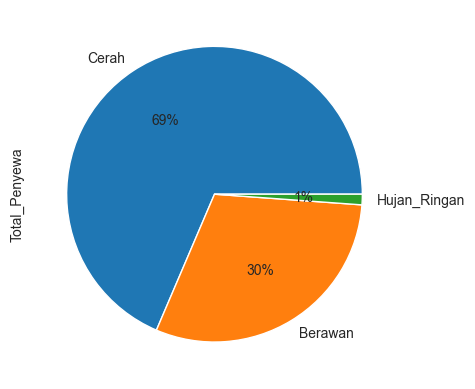

In [63]:
hari_df.groupby(by="cuaca").agg({
   "Total_Penyewa":"sum"
}).plot(kind='pie', y='Total_Penyewa', autopct = '%1.0f%%', legend=False)

Berdasarkan grafik tersebut, 
1. Sebagian besar penyewa sepeda memilih untuk menyewa sepeda pada cuaca cerah, sekitar 69% penyewa dari total keseluruhan penyewa sepeda selama 2011-2012.
2. Hari Minggu menjadi hari dengan jumlah penyewa sepeda paling sedikit, sekitar 13% dari total keseluruhan penyewa sepeda selama 2011-2012.

### Pertanyaan 6 : Berapa banyak penyewaan sepeda per tiap jam nya?

Text(0.5, 1.0, 'Banyak perental sepeda tiap musim pada tahun 2011-2012')

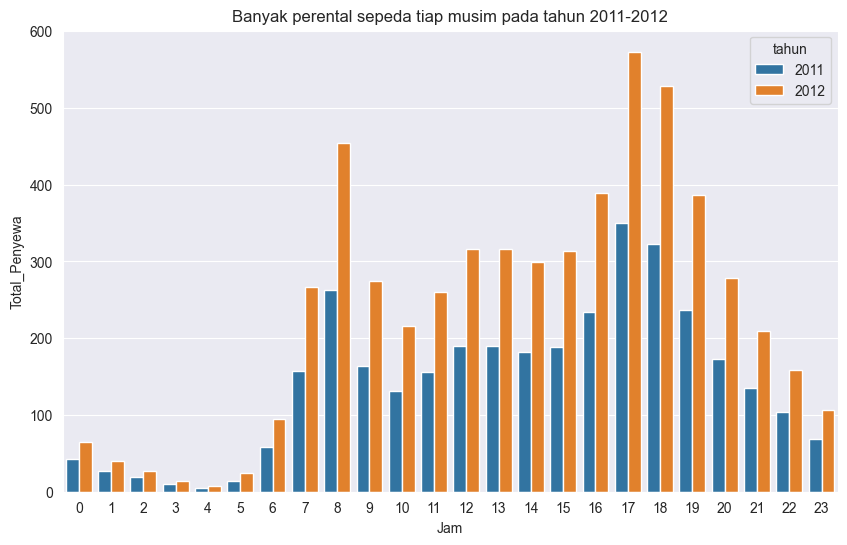

In [64]:
plt.figure(figsize=(10,6))

sns.barplot(x='jam', y='Total_Penyewa',  data=jam_df, hue='tahun', errorbar=None)

plt.xlabel('Jam')
plt.ylabel('Total_Penyewa')
plt.title('Banyak perental sepeda tiap musim pada tahun 2011-2012')

Tiap jam nya, jumlah penyewa selalu bervariasi. <br>
Penyewa terbanyak pada jam 17.

## Conclusion

1. Berapa banyak penyewaan sepeda pada tiap hari nya?
<br> Sebagian besar penyewa sepeda memilih untuk menyewa sepeda pada hari kerja, dengan yang terbanyak menyewa sepeda pada hari Jum'at dan Kamis
2. Berapa banyak penyewaan sepeda pada tiap musimnya?<br>
Musim gugur sebagai waktu musim dengan penyewa sepeda terbanyak.
3. Bagaimana perkembangan jumlah penyewa sepeda dari tahun 2011 hingga 2012?<br>
Terjadi peningkatan jumlah penyewa sepeda dari tahun 2011 ke tahun 2012.
4. Bagaimana jumlah penyewa sepeda pada tiap bulannya pada 2011 - 2012?<br>
Selama periode tersebut, tiap bulannya jumlah penyewa sepeda berubah-ubah. Bulan Agustus merupakan bulan dengan jumlah penyewa sepeda terbanyak.
5. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?<br>
Sebagian besar penyewa sepeda memilih menyewa sepeda pada saat kondisi cuaca cerah.
6. Berapa banyak penyewaan sepeda per tiap jam pada tiap hari nya dan pada jam berapa diperoleh penyewaan sepeda terbanyak?<br>
Tiap jamnya, jumlah penyewa selalu berubah-ubah. Sebagian besar penyewa memilih menyewa sepeda pada waktu sore hari, yaitu sekitar jam 16 - 18.

## Simpan data yang sudah dibersihkan sebagai file dataset csv yang baru

Dataset yang sudah diolah, disimpan sebagai file dataset csv yang baru untuk digunakan pada pembuatan dashboard

In [65]:
hari_df.to_csv("new_hari.csv", index=False)

In [66]:
jam_df.to_csv("new_jam.csv", index=False)

In [67]:
hari2011_df.to_csv("new_hari2011.csv", index=False)

In [68]:
hari2012_df.to_csv("new_hari2012.csv", index=False)

In [69]:
jam2011_df.to_csv("new_jam2011.csv", index=False)

In [70]:
jam2012_df.to_csv("new_jam2012.csv", index=False)